<a href="https://colab.research.google.com/github/Shaan2522/DL-Models/blob/main/4_Admission_Prediction_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import necessary libraries**

---



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Data Pre-processing**

---



In [3]:
df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Datasets/Admission_Predict_Ver1.1.csv', encoding='latin-1')
df.head(), df.shape

(   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
 0           1        337          118                  4  4.5   4.5  9.65   
 1           2        324          107                  4  4.0   4.5  8.87   
 2           3        316          104                  3  3.0   3.5  8.00   
 3           4        322          110                  3  3.5   2.5  8.67   
 4           5        314          103                  2  2.0   3.0  8.21   
 
    Research  Chance of Admit   
 0         1              0.92  
 1         1              0.76  
 2         1              0.72  
 3         1              0.80  
 4         0              0.65  ,
 (500, 9))

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.drop(columns=['Serial No.'], inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]
X.head(), y.head()

(   GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
 0        337          118                  4  4.5   4.5  9.65         1
 1        324          107                  4  4.0   4.5  8.87         1
 2        316          104                  3  3.0   3.5  8.00         1
 3        322          110                  3  3.5   2.5  8.67         1
 4        314          103                  2  2.0   3.0  8.21         0,
 0    0.92
 1    0.76
 2    0.72
 3    0.80
 4    0.65
 Name: Chance of Admit , dtype: float64)

**Model Building**

---



In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
249,321,111,3,3.5,4.0,8.83,1
433,316,111,4,4.0,5.0,8.54,0
19,303,102,3,3.5,3.0,8.50,0
322,314,107,2,2.5,4.0,8.27,0
332,308,106,3,3.5,2.5,8.21,1
...,...,...,...,...,...,...,...
106,329,111,4,4.5,4.5,9.18,1
270,306,105,2,2.5,3.0,8.22,1
348,302,99,1,2.0,2.0,7.25,0
435,309,105,2,2.5,4.0,7.68,0


In [11]:
y_train

249    0.77
433    0.71
19     0.62
322    0.72
332    0.75
       ... 
106    0.87
270    0.72
348    0.57
435    0.55
102    0.62
Name: Chance of Admit , Length: 400, dtype: float64

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
X_train_scaled

array([[0.62      , 0.67857143, 0.5       , ..., 0.71428571, 0.65064103,
        1.        ],
       [0.52      , 0.67857143, 0.75      , ..., 1.        , 0.55769231,
        0.        ],
       [0.26      , 0.35714286, 0.5       , ..., 0.42857143, 0.54487179,
        0.        ],
       ...,
       [0.24      , 0.25      , 0.        , ..., 0.14285714, 0.14423077,
        0.        ],
       [0.38      , 0.46428571, 0.25      , ..., 0.71428571, 0.28205128,
        0.        ],
       [0.48      , 0.5       , 0.25      , ..., 0.57142857, 0.46474359,
        0.        ]])

In [14]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [15]:
model = Sequential()

model.add(Dense(7, activation='relu', input_dim=7))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='linear')) # since its a regression problem hence linear

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 7)                 56        
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120 (480.00 Byte)
Trainable params: 120 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [18]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split = 0.2)

Epoch 1/100
10/10 [==============================] - 2s 80ms/step - loss: 0.4916 - val_loss: 0.4446
Epoch 2/100
10/10 [==============================] - 0s 10ms/step - loss: 0.3954 - val_loss: 0.3448
Epoch 3/100
10/10 [==============================] - 0s 17ms/step - loss: 0.3152 - val_loss: 0.2642
Epoch 4/100
10/10 [==============================] - 0s 21ms/step - loss: 0.2470 - val_loss: 0.2000
Epoch 5/100
10/10 [==============================] - 0s 31ms/step - loss: 0.1907 - val_loss: 0.1465
Epoch 6/100
10/10 [==============================] - 0s 26ms/step - loss: 0.1430 - val_loss: 0.1007
Epoch 7/100
10/10 [==============================] - 0s 33ms/step - loss: 0.0994 - val_loss: 0.0611
Epoch 8/100
10/10 [==============================] - 0s 26ms/step - loss: 0.0580 - val_loss: 0.0378
Epoch 9/100
10/10 [==============================] - 0s 20ms/step - loss: 0.0387 - val_loss: 0.0387
Epoch 10/100
10/10 [==============================] - 0s 14ms/step - loss: 0.0334 - val_loss: 0.0366

**Model Evaluation**

---



In [19]:
y_pred = model.predict(X_test_scaled)

4/4 [==============================] - 0s 4ms/step


In [20]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.7748419117970482

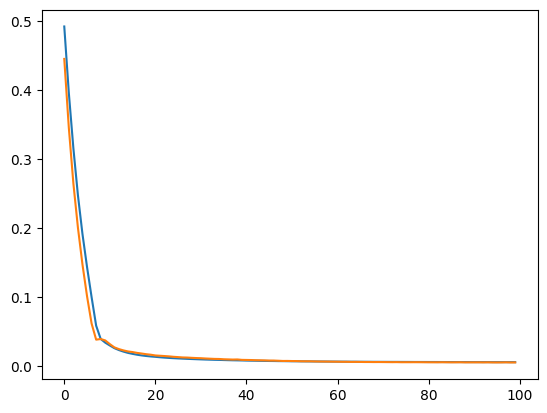

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])